In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
flights = sns.load_dataset('flights') # 연, 월, 승객수
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
flights['month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [9]:
flights[flights['month'] == 'Jan']

,year,month,passengers
0,1949,Jan,112
12,1950,Jan,115
24,1951,Jan,145
36,1952,Jan,171
48,1953,Jan,196
60,1954,Jan,204
72,1955,Jan,242
84,1956,Jan,284
96,1957,Jan,315
108,1958,Jan,340


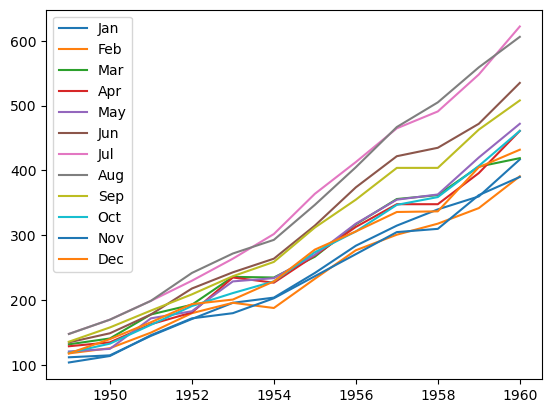

In [15]:
for month in flights['month'].unique() :
    sub = flights[flights['month'] == month]
    plt.plot(sub['year'], sub['passengers'], label = month)
plt.legend()
plt.show()

In [18]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


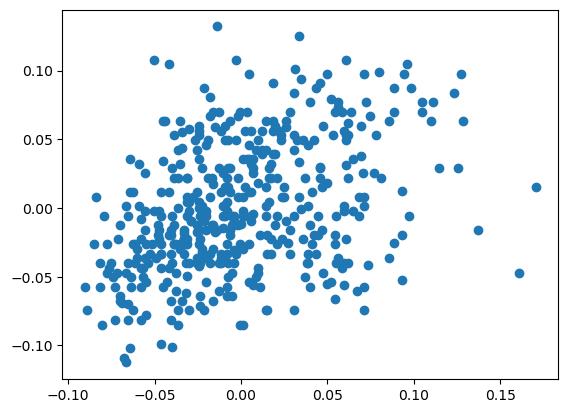

In [19]:
plt.scatter(df['bmi'], df['bp'])

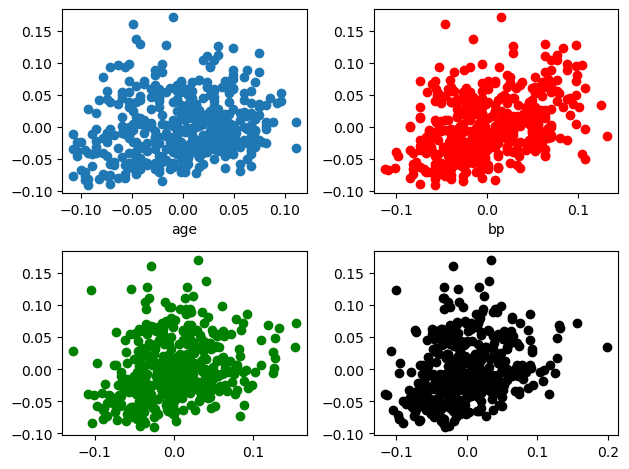

In [32]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].scatter(df['age'], df['bmi'])
axes[0, 0].set_xlabel('age')

axes[0, 1].scatter(df['bp'], df['bmi'], color='red')
axes[0, 1].set_xlabel('bp')

axes[1, 0].scatter(df['s1'], df['bmi'], color='green')

axes[1, 1].scatter(df['s2'], df['bmi'], color='black')

plt.tight_layout()

In [31]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [34]:
surv_s = titanic.groupby('sex')['survived'].mean().reset_index()

<Axes: xlabel='sex', ylabel='survived'>

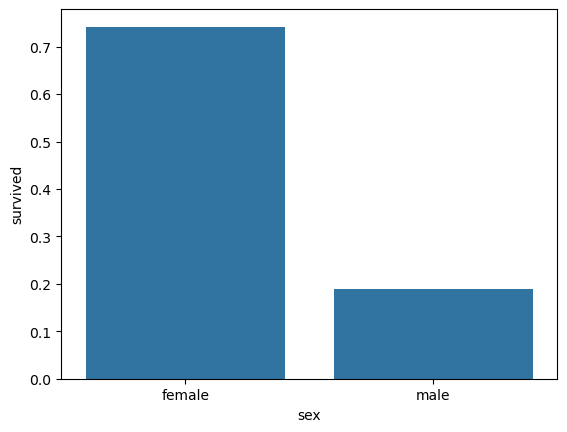

In [36]:
sns.barplot(surv_s, x = 'sex', y = 'survived')

In [40]:
surv_s = titanic.groupby('sex')['survived'].mean().reset_index()
surv_s

,sex,survived
0,female,0.742038
1,male,0.188908


In [39]:
surv_c = titanic.groupby('class')['survived'].mean().reset_index()
surv_c

,class,survived
0,First,0.629630
1,Second,0.472826
2,Third,0.242363


In [48]:
surv_cs = titanic.groupby(['class', 'sex'])['survived'].mean().reset_index()
surv_cs

,class,sex,survived
0,First,female,0.968085
1,First,male,0.368852
2,Second,female,0.921053
3,Second,male,0.157407
4,Third,female,0.500000
5,Third,male,0.135447


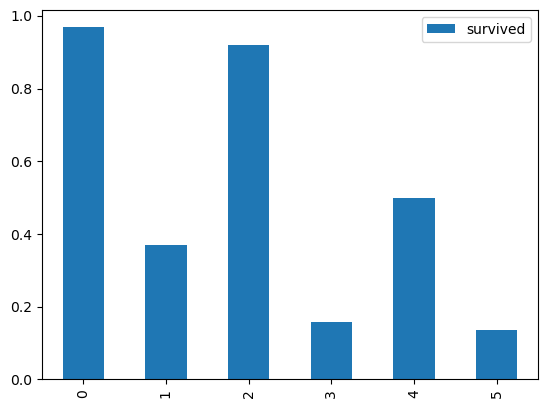

In [124]:
surv_cs = titanic.groupby(['class', 'sex'])['survived'].mean().reset_index()
surv_cs

surv_cs.plot(kind = 'bar')

plt.legend()

In [55]:
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [72]:
# median
median_p = diamonds['price'].median()

# median 기준 high, low
price_levels = []

for price in diamonds['price'] :
    if price > median_p :
        price_levels.append('high')
    else :
        price_levels.append('low')
        
# diamonds['price_level'] = np.where(diamonds['price'] > median_p, 'high', 'low')
# diamonds.head()

In [73]:
price_levels

['low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 

In [74]:
diamonds['price_level'] = price_levels
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_level
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,low
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,low
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,low
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,low
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,low


In [58]:
median_p

2401.0

In [63]:
low_prices = diamonds[diamonds['price_level'] == 'low']['price']
high_prices = diamonds[diamonds['price_level'] == 'high']['price']

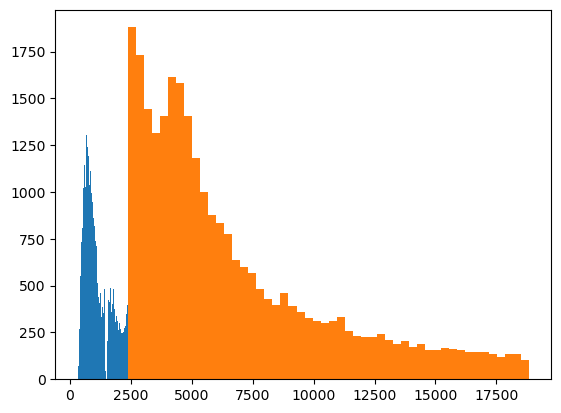

In [66]:
plt.hist(low_prices, bins=50)
plt.hist(high_prices, bins=50)

plt.show()

In [76]:
low_p_carat = diamonds[diamonds['price_level'] == 'low']['carat']
high_p_carat = diamonds[diamonds['price_level'] == 'high']['carat']

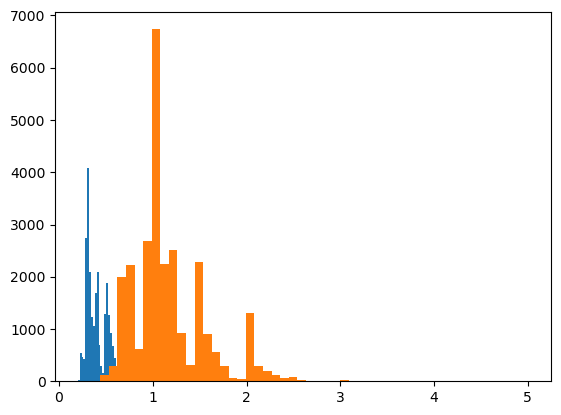

In [77]:
plt.hist(low_p_carat, bins=50)
plt.hist(high_p_carat, bins=50)

plt.show()

In [78]:
# 히트맵
iris = sns.load_dataset('iris')

In [80]:
iris = iris.drop('species', axis=1)
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [81]:
corr = iris.corr()

In [82]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

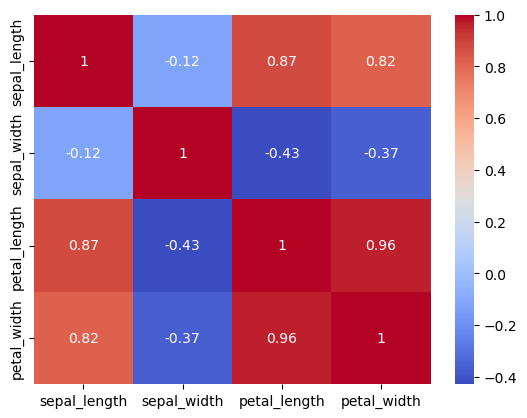

In [87]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [89]:
# pie plot
iris_m = iris.mean()
iris_m

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

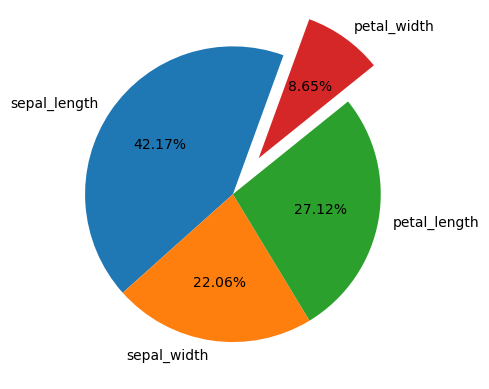

In [107]:
plt.pie(iris_m, labels= iris_m.index, autopct='%.2f%%', explode=(0,0,0,0.3), startangle=70)
plt.show()

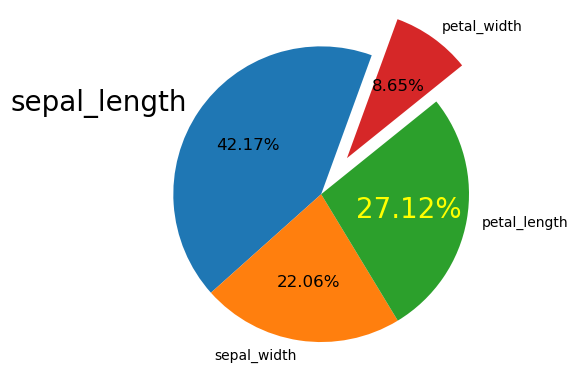

In [118]:
patches, texts, autotexts = plt.pie(iris_m, labels= iris_m.index, autopct='%.2f%%', explode=(0,0,0,0.3), startangle=70)
plt.setp(autotexts, size=12)
autotexts[2].set_color('yellow')
autotexts[2].set_size(20)
texts[0].set_size(20)

plt.show()

In [120]:
# titanic 데이터셋을 이용해 수치형 변수 간의 상관관계를 히트맵으로 시각화

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [125]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [132]:
titanic_nv = titanic.drop(['sex', 'class', 'embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis=1)
titanic_nv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [134]:
titanic_df = titanic_nv.corr()
titanic_df

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


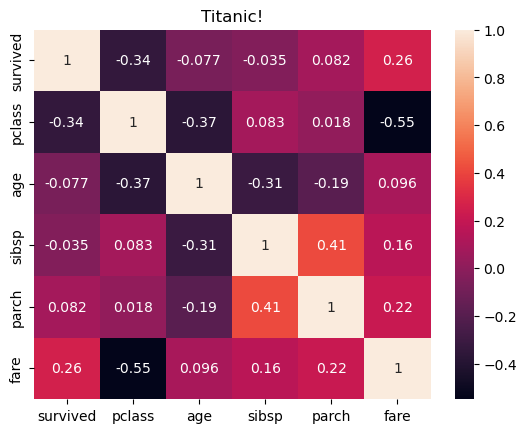

In [137]:
sns.heatmap(titanic_df, annot=True)
plt.title("Titanic!")
plt.show()

In [139]:
# tips 데이터에서 요일별 방문 횟수 비율을 파이차트로 시각화
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [144]:
tips['day'].unique()
day_count = []

for day in tips['day'].unique() :
    day_count.append(tips[tips['day'] == day]['size'].count())

day_count

[76, 87, 62, 19]

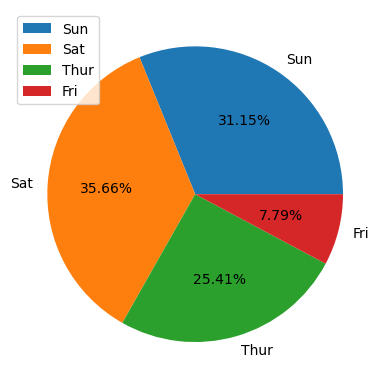

In [148]:
plt.pie(day_count, labels=tips['day'].unique(), autopct='%.2f%%')
plt.legend()

plt.show()